     ┌───┐      ░                ┌─┐   
q_0: ┤ H ├──────░──────────■───X─┤M├───
     ├───┤┌───┐ ░ ┌─────┐┌─┴─┐ │ └╥┘┌─┐
q_1: ┤ X ├┤ H ├─░─┤ Tdg ├┤ X ├─X──╫─┤M├
     ├───┤└───┘ ░ └─┬─┬─┘└───┘    ║ └╥┘
q_2: ┤ H ├──────░───┤M├───────────╫──╫─
     └───┘      ░   └╥┘           ║  ║ 
c: 3/════════════════╩════════════╩══╩═
                     2            0  1 


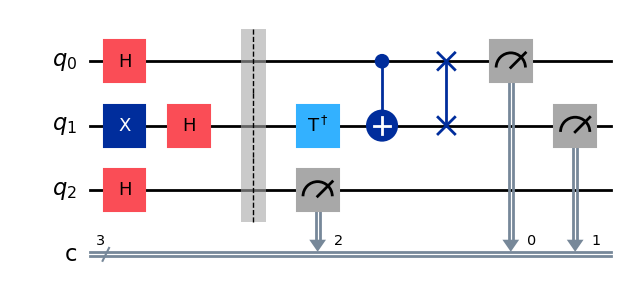

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from quantum_viz import Viewer

# Build a quantum circuit
circuit = QuantumCircuit(3, 3)
 
circuit.x(1)
circuit.h(range(3))
circuit.barrier()
circuit.tdg(1)
circuit.cx(0, 1)
circuit.swap(0,1)
circuit.measure(range(3), range(3));

print(circuit)
circuit.draw(output='mpl', style='iqp')


In [7]:
Viewer(circuit)

      ┌───┐┌─┐┌────────── ┌──────────── ┌───┐┌──────────── ┌───┐ ───────┐ ┌─┐
  q0: ┤ H ├┤M├┤ Switch-0  ┤ Case-0 (0)  ┤ X ├┤ Case-0 (1)  ┤ Z ├  End-0 ├─┤M├
      └───┘└╥┘└────╥───── └──────────── └───┘└──────────── └───┘ ───────┘ └╥┘
            ║ ┌────╨─────┐                                                 ║ 
c0: 1/══════╩═╡ c0_0=0x1 ╞═════════════════════════════════════════════════╩═
            0 └──────────┘                                                 0 


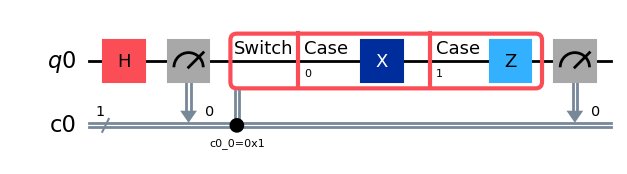

In [2]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits

circuit.h(q0)
circuit.measure(q0, c0)
with circuit.switch(c0) as case:
    with case(0):
        circuit.x(q0)
    with case(1):
        circuit.z(q0)
circuit.measure(q0, c0)

print(circuit)
circuit.draw(output='mpl', style='iqp')

      ┌─────────────────── ┌───┐ ───────┐ ┌─┐
  q1: ┤ For-0 range(0, 5)  ┤ X ├  End-0 ├─┤M├
      └─────────────────── └───┘ ───────┘ └╥┘
c1: 1/═════════════════════════════════════╩═
                                           0 


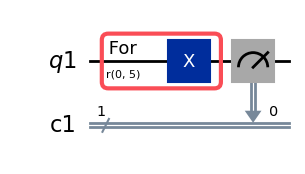

In [3]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
with circuit.for_loop(range(5)) as _:
    circuit.x(q0)
circuit.measure(q0, c0)
 
print(circuit)
circuit.draw(output='mpl', style='iqp')

      ┌───┐┌─┐   ┌───────── ┌───┐┌─┐    ───────┐ 
q2_0: ┤ H ├┤M├───┤          ┤ H ├┤M├───        ├─
      ├───┤└╥┘┌─┐│ While-0  ├───┤└╥┘┌─┐  End-0 │ 
q2_1: ┤ H ├─╫─┤M├┤          ┤ H ├─╫─┤M├        ├─
      └───┘ ║ └╥┘└────╥──── └───┘ ║ └╥┘ ───────┘ 
            ║  ║   ┌──╨──┐        ║  ║           
c2: 2/══════╩══╩═══╡ 0x3 ╞════════╩══╩═══════════
            0  1   └─────┘        0  1           


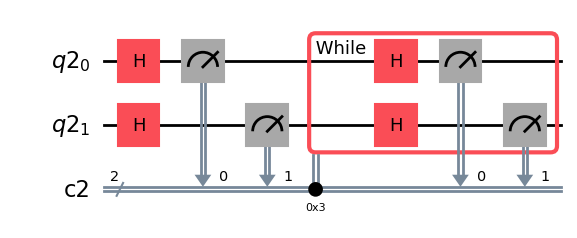

In [4]:
qubits = QuantumRegister(2)
clbits = ClassicalRegister(2)
circuit = QuantumCircuit(qubits, clbits)
 
q0, q1 = qubits
c0, c1 = clbits
 
circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.while_loop((clbits, 0b11)):
    circuit.h([q0, q1])
    circuit.measure(q0, c0)
    circuit.measure(q1, c1)
 

print(circuit)
circuit.draw(output='mpl', style='iqp')
 
# example output counts: {'01': 334, '10': 368, '00': 322}